In [2]:
import scanpy as sc
import seaborn as sns
import numpy as np
import scvi
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy
directory = '/Users/david/Dropbox/RNASeq/AllenPAL'

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#downloaded from https://allen-brain-cell-atlas.s3.us-west-2.amazonaws.com/index.html#expression_matrices/WMB-10Xv3/20230630/
adata = sc.read_h5ad(directory+'/Data/WMB-10Xv3-PAL-raw.h5ad')  

In [4]:
adata.var

,gene_symbol
gene_identifier,
ENSMUSG00000051951,Xkr4
ENSMUSG00000089699,Gm1992
ENSMUSG00000102331,Gm19938
ENSMUSG00000102343,Gm37381
ENSMUSG00000025900,Rp1
...,...
ENSMUSG00000095523,AC124606.1
ENSMUSG00000095475,AC133095.2
ENSMUSG00000094855,AC133095.1


In [18]:
from scipy.sparse import csr_matrix
adata.X = csr_matrix(adata.X)

In [19]:
sc.pp.filter_genes(adata, min_cells = 10)
adata.X.shape

(108677, 26579)

In [21]:
adata.layers['counts'] = adata.X.copy() #save a raw counts version

In [22]:
sc.pp.normalize_total(adata, target_sum = 1e4)

In [23]:
sc.pp.scale(adata, max_value=10)

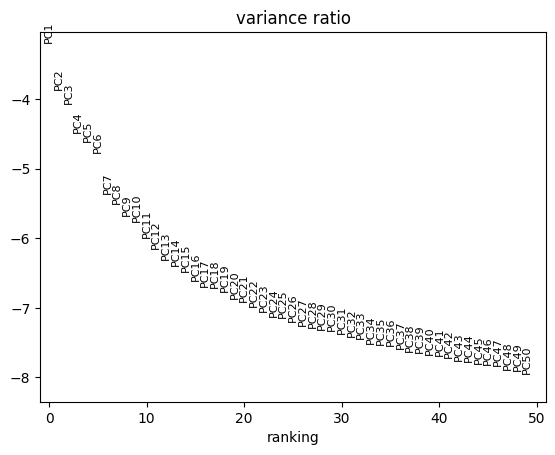

In [24]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [25]:
sc.pp.neighbors(adata, n_pcs = 19)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


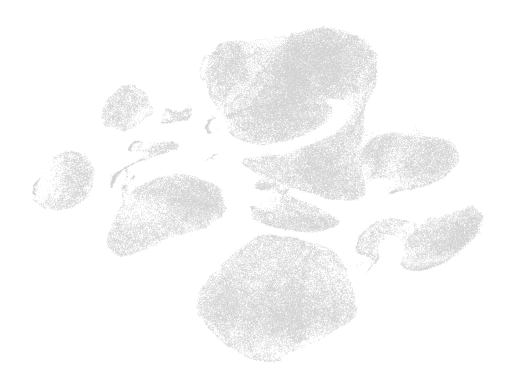

In [26]:
sc.tl.umap(adata, min_dist=0.5)
sc.pl.umap(adata, frameon = False)

In [30]:
adata.var.index=adata.var.gene_symbol

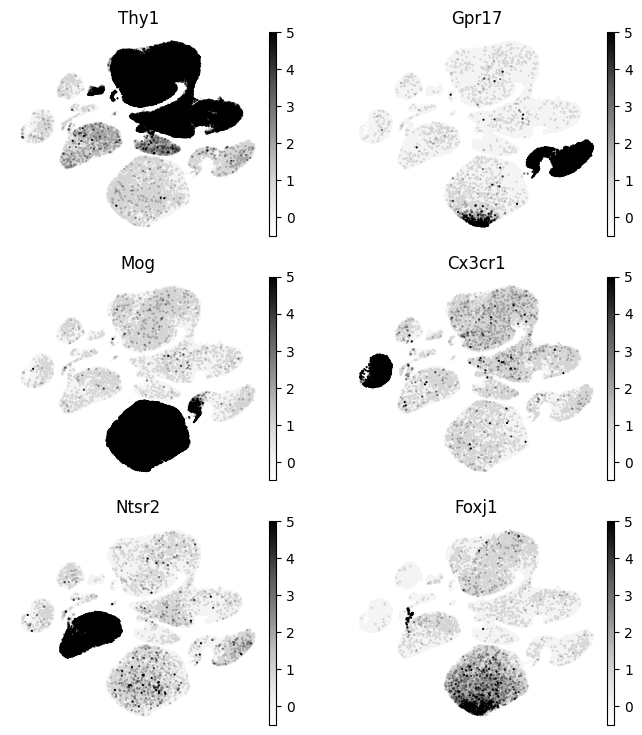

In [31]:
plt.figure(figsize = (8,9))
um = plt.subplot(3,2,1)
um = sc.pl.umap(adata, color = ['Thy1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,2)
um = sc.pl.umap(adata, color = ['Gpr17'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,3)
um = sc.pl.umap(adata, color = ['Mog'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,4)
um = sc.pl.umap(adata, color = ['Cx3cr1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,5)
um = sc.pl.umap(adata, color = ['Ntsr2'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,6)
um = sc.pl.umap(adata, color = ['Foxj1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)

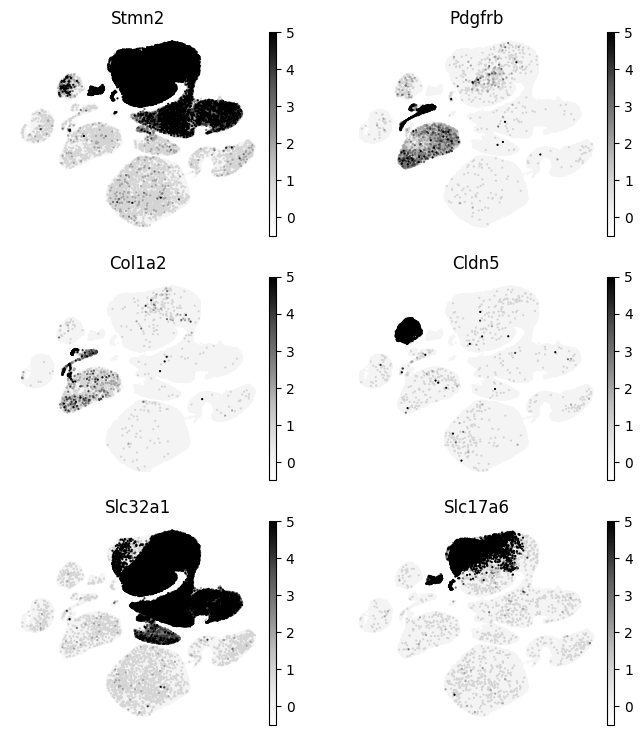

In [37]:
plt.figure(figsize = (8,9))
um = plt.subplot(3,2,1)
um = sc.pl.umap(adata, color = ['Stmn2'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,2)
um = sc.pl.umap(adata, color = ['Pdgfrb'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,3)
um = sc.pl.umap(adata, color = ['Col1a2'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,4)
um = sc.pl.umap(adata, color = ['Cldn5'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,5)
um = sc.pl.umap(adata, color = ['Slc32a1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,6)
um = sc.pl.umap(adata, color = ['Slc17a6'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)

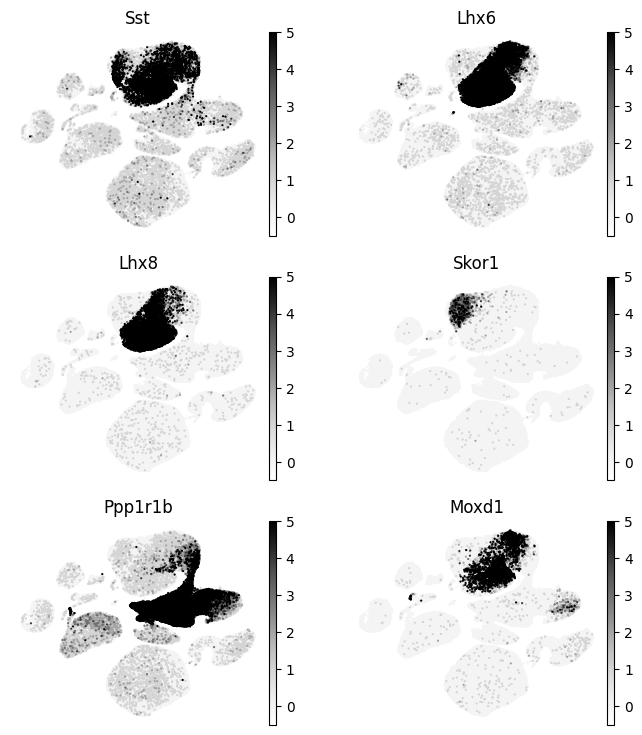

In [36]:
plt.figure(figsize = (8,9))
um = plt.subplot(3,2,1)
um = sc.pl.umap(adata, color = ['Sst'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,2)
um = sc.pl.umap(adata, color = ['Lhx6'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,3)
um = sc.pl.umap(adata, color = ['Lhx8'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,4)
um = sc.pl.umap(adata, color = ['Skor1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,5)
um = sc.pl.umap(adata, color = ['Ppp1r1b'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,6)
um = sc.pl.umap(adata, color = ['Moxd1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)

In [42]:
sc.tl.leiden(adata, resolution = 0.07)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


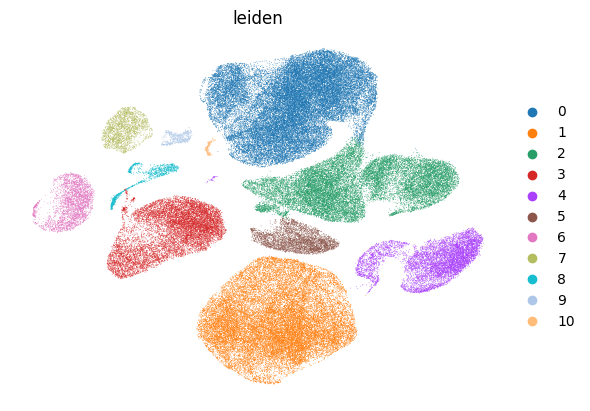

In [43]:
sc.pl.umap(adata, color = ['leiden'], frameon = False)

In [44]:
cell_type = {"0":"Neurons",
             "1":"Other",
"2":"Neurons",
"3":"Other",
"4":"Other",
"5":"Neurons",
"6":"Other",
"7":"Other",
"8":"Other",
"9":"Neurons", 
"10":"Neurons"             
}

adata.obs['celltype'] = adata.obs.leiden.map(cell_type)

In [45]:
ctcolorsN = {"Neurons":(0.71, 0.88, 0.54),
            "Other":(0.8, 0.8, 0.8),
           }

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


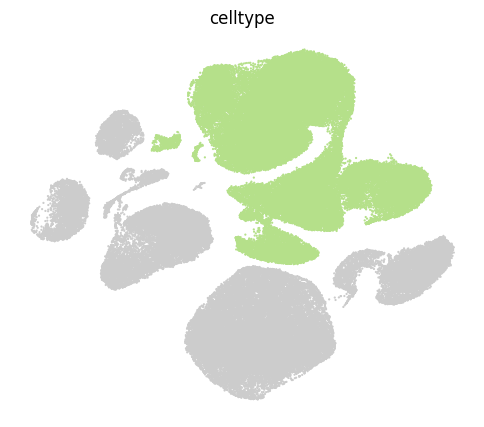

In [47]:
plt.figure(figsize = (6,5))
um = plt.subplot(1,1,1)
um = sc.pl.umap(adata, color = ['celltype'], frameon = False, size=10, ax = um, palette = ctcolorsN, show=False, legend_loc='off right')
plt.savefig(directory + '/Figures/cellsUMAPN.png')

In [50]:
isneuron = adata.obs['celltype']=='Neurons'

In [49]:
adata.write_h5ad(directory + '/allCells.h5ad')

In [51]:
adata = adata[isneuron]

In [52]:
adata.X.shape

(58337, 26579)

In [53]:
adata.write_h5ad(directory + '/neurons.h5ad')